In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_orig = pd.read_csv("train.csv")
df_orig.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
df_orig.isnull().sum(axis=1).value_counts()

0    18590
1     3713
2      432
3       15
dtype: int64

In [4]:
round(df_orig.isnull().sum(axis=1).value_counts()[0] / len(df_orig), 3)

0.817

In [5]:
#just drop all the nulls and downsample for viz
df_cl = df_orig.dropna().sample(frac = 0.10)
df_cl.columns = [name.replace(" ", "_") for name in df_cl.columns]
df_cl.head()

,Employee_ID,Date_of_Joining,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
2400,fffe32003500380031003900,2008-05-11,Male,Product,Yes,2.0,4.0,6.3,0.45
16643,fffe32003900380037003100,2008-09-28,Male,Service,No,1.0,4.0,4.2,0.31
13710,fffe32003500350030003100,2008-12-24,Male,Product,Yes,3.0,6.0,8.4,0.66
15971,fffe32003600310038003400,2008-05-05,Female,Service,Yes,2.0,5.0,4.8,0.40
21370,fffe3900350034003400,2008-01-18,Female,Product,Yes,3.0,4.0,5.2,0.41


In [6]:
df_cl.to_csv("narr_viz_data.csv")

In [7]:
#df_cl.describe()

## Scene 2: Attr bar charts
Let user chose x-axis attr

<BarContainer object of 2 artists>

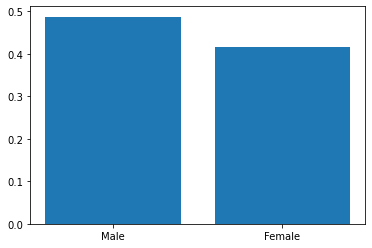

In [8]:
labels = list(df_cl["Gender"].unique())
data = [df_cl[df_cl['Gender'] == labels[0]]["Burn_Rate"].mean(),
        df_cl[df_cl['Gender'] == labels[1]]["Burn_Rate"].mean()]

plt.bar(labels, data)

<BarContainer object of 2 artists>

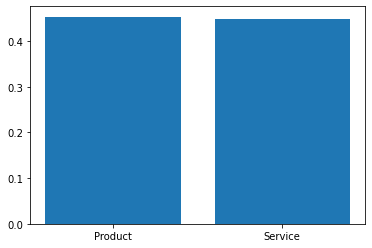

In [9]:
labels = list(df_cl["Company_Type"].unique())
data = [df_cl[df_cl['Company_Type'] == labels[0]]["Burn_Rate"].mean(),
        df_cl[df_cl['Company_Type'] == labels[1]]["Burn_Rate"].mean()]

plt.bar(labels, data)

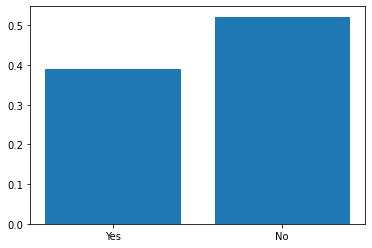

In [10]:
labels = list(df_cl["WFH_Setup_Available"].unique())
data = [df_cl[df_cl['WFH_Setup_Available'] == labels[0]]["Burn_Rate"].mean(),
        df_cl[df_cl['WFH_Setup_Available'] == labels[1]]["Burn_Rate"].mean()]

plt.bar(labels, data)

plt.pie = (labels)

<BarContainer object of 6 artists>

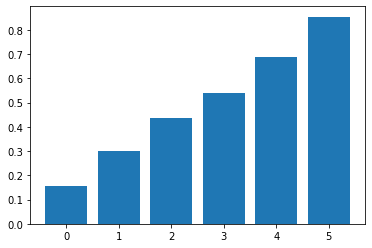

In [11]:
labels = sorted(list(df_cl["Designation"].unique()))
data = [df_cl[df_cl['Designation'] == l]["Burn_Rate"].mean() 
        for l in labels]

plt.bar(labels, data)

<BarContainer object of 10 artists>

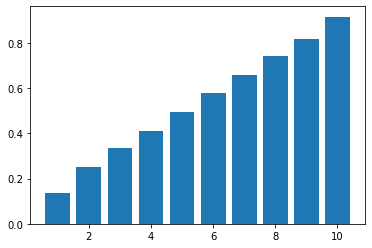

In [12]:
labels = sorted(list(df_cl["Resource_Allocation"].unique()))
data = [df_cl[df_cl['Resource_Allocation'] == l]["Burn_Rate"].mean() 
        for l in labels]

plt.bar(labels, data)

## Scene 1: Attr w multiple vals (?)
Users explore breakdown of dataset
let user choose attr for chart

(-1.1110160538303195,
 1.1227854228609995,
 -1.1086815393770881,
 1.1004134066370042)

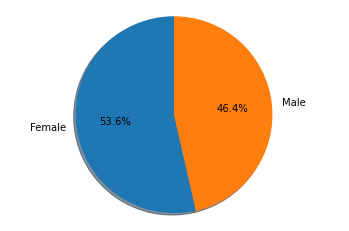

In [13]:
field = "Gender"
labels = sorted(list(df_cl[field].unique()))
data = [100* len(df_cl[df_cl[field] == l]) / len(df_cl) 
        for l in labels]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

(-1.101101539047002,
 1.1005906384882538,
 -1.1010696269144147,
 1.100050934614972)

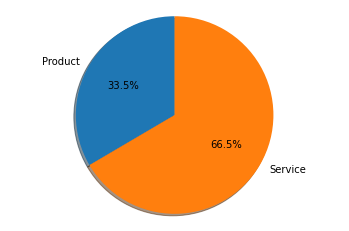

In [14]:
field = "Company_Type"
labels = sorted(list(df_cl[field].unique()))
data = [100* len(df_cl[df_cl[field] == l]) / len(df_cl) 
        for l in labels]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

(-1.124765950991248, 1.111682284204025, -1.1103253693408812, 1.100491712178465)

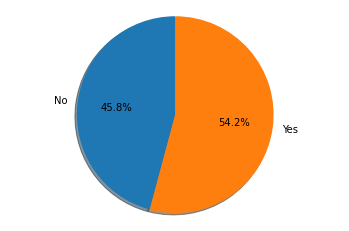

In [15]:
field = "WFH_Setup_Available"
labels = sorted(list(df_cl[field].unique()))
data = [100* len(df_cl[df_cl[field] == l]) / len(df_cl) 
        for l in labels]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

(-1.1251524974063658,
 1.1047089035648778,
 -1.1160622254691117,
 1.1007648726938235)

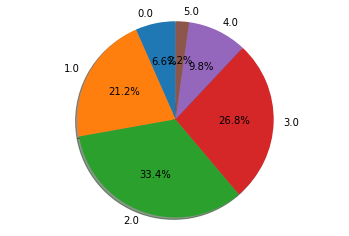

In [16]:
field = "Designation"
labels = sorted(list(df_cl[field].unique()))
data = [100* len(df_cl[df_cl[field] == l]) / len(df_cl) 
        for l in labels]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

(-1.101620131054546,
 1.1085306482268062,
 -1.1173817984279515,
 1.1008277046870454)

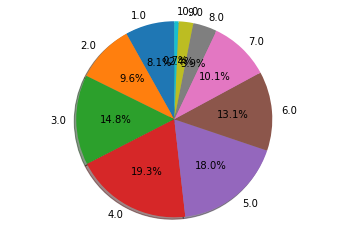

In [17]:
field = "Resource_Allocation"
labels = sorted(list(df_cl[field].unique()))
data = [100* len(df_cl[df_cl[field] == l]) / len(df_cl) 
        for l in labels]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

## Scene 3: Scatter plots

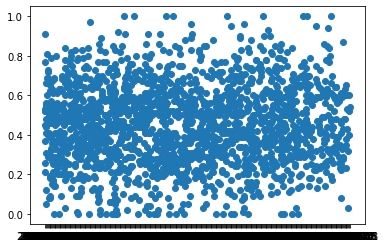

In [18]:
plt.scatter(df_cl["Date_of_Joining"], df_cl["Burn_Rate"])
#should I even do this chart?  Maybe not

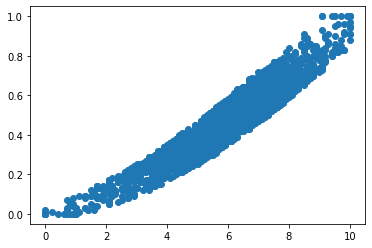

In [19]:
plt.scatter(df_cl["Mental_Fatigue_Score"], df_cl["Burn_Rate"])

In [20]:
#Finish presentation with version of this plot where it's color-coded 
#for different attr (Gender, Designation, etc)